In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

# for preparing the CSV file 
dataset_gd = df_test


df_train.shape

(891, 12)

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#Find columns with Nans in them
print("Columns with missing values: ")
print(df_train.columns[df_train.isnull().any()].tolist())

Columns with missing values: 
['Age', 'Cabin', 'Embarked']


In [7]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


There are 3 ways to handle null values

1.Remove NaN rows
  2.Set NaN to hard coded value
  3.Impute NaN values based on other rows  
  here, for Embarked we did 1

In [8]:
print("Before dropping - " + str(len(df_train)) + " rows")
df_train = df_train[~df_train['Embarked'].isna()]
print("After dropping - " + str(len(df_train)) + " rows")

Before dropping - 891 rows
After dropping - 889 rows


For Cabin we will do 3. Impute NaN values based on other rows.

In [9]:
df_train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
A26            1
A19            1
B39            1
D49            1
E40            1
Name: Cabin, Length: 146, dtype: int64

In [10]:
most_frequent_cabin = df_train['Cabin'].value_counts().idxmax()
print("Most Frequent Cabin = " + most_frequent_cabin)
print("NA count before fill = " + str(len(df_train[df_train['Cabin'].isna()])))
df_train['Cabin'] = df_train['Cabin'].fillna(most_frequent_cabin)
print("NA count after fill = " + str(len(df_train[df_train['Cabin'].isna()])))

Most Frequent Cabin = G6
NA count before fill = 687
NA count after fill = 0


Since Age is numerical, let us impute its value by filling it with the mean age of passengers on the ship.

In [11]:
mean_age = df_train['Age'].mean()
print("Mean age of passengers = " + str(mean_age))
print("NA count before fill = " + str(len(df_train[df_train['Age'].isna()])))
df_train['Age'] = df_train['Age'].fillna(mean_age)
print("NA count after fill = " + str(len(df_train[df_train['Age'].isna()])))

Mean age of passengers = 29.64209269662921
NA count before fill = 177
NA count after fill = 0


In [12]:
#statistical distribution
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


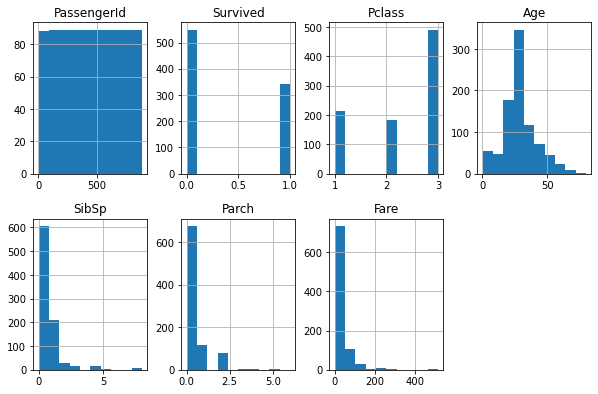

In [13]:
hist = df_train.hist(figsize=(10,10),layout=(3,4))

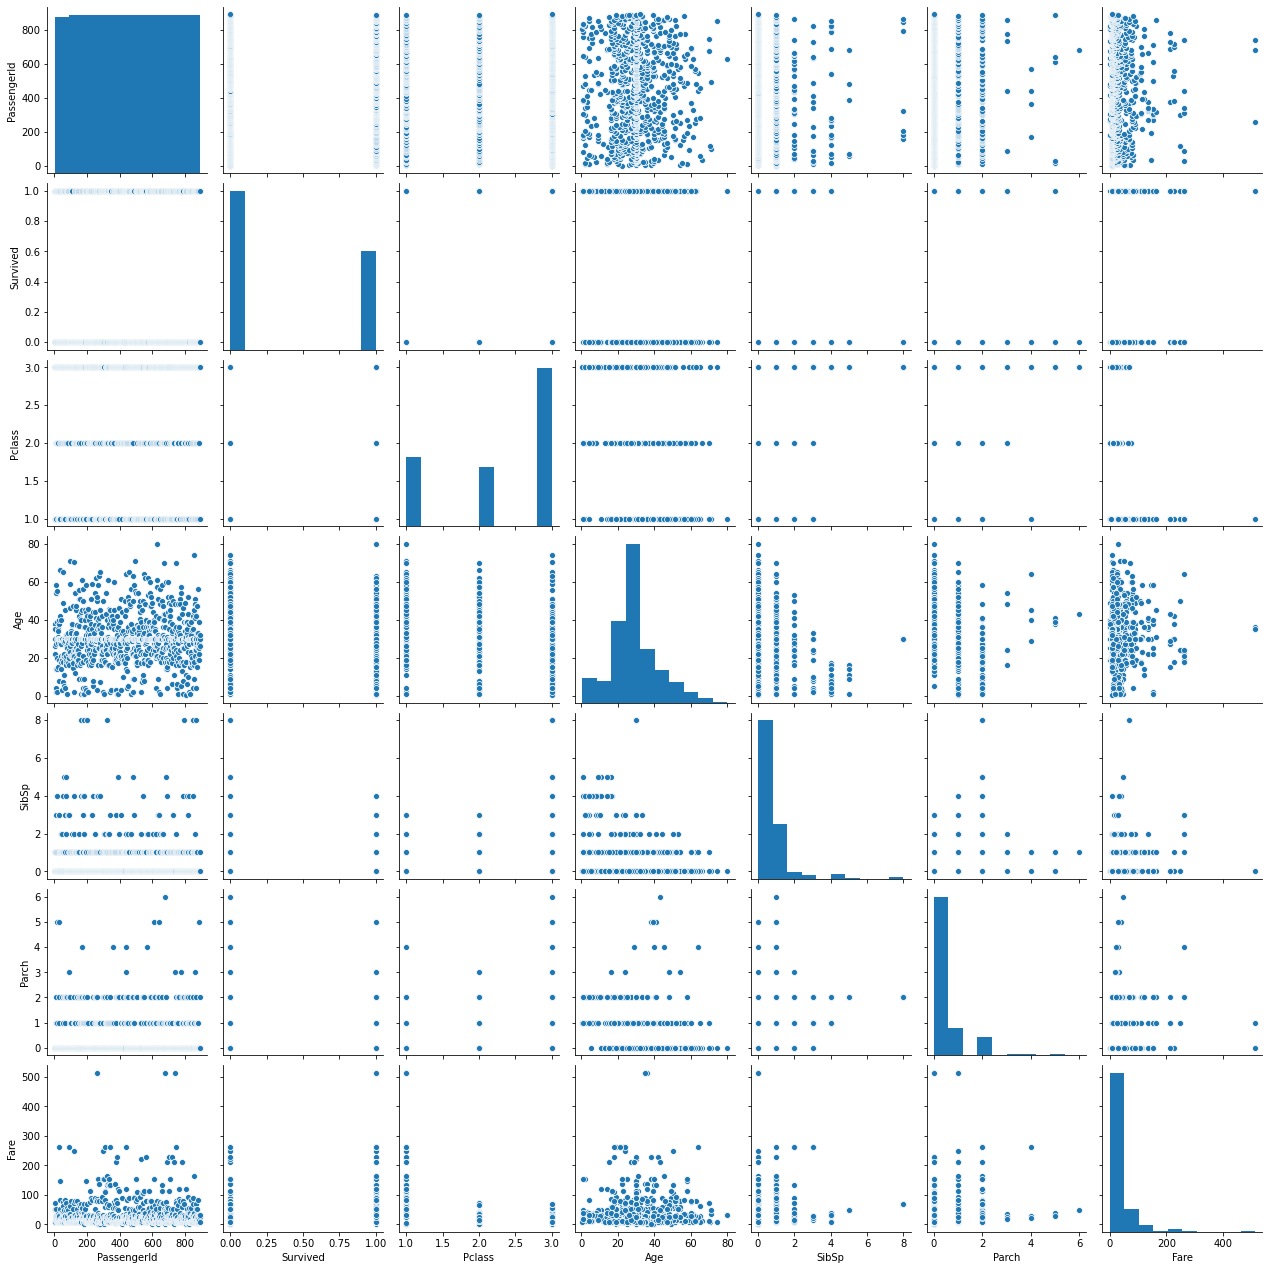

In [14]:
sns.pairplot(df_train)
plt.show()

Correlation between data

In [15]:

corr=df_train.corr()

corr.style.background_gradient(cmap='coolwarm')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030335,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074513,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.328256,0.081656,0.016824,-0.548193
Age,0.030335,-0.074513,-0.328256,1.000000,-0.231908,-0.178013,0.088780
SibSp,-0.057686,-0.034040,0.081656,-0.231908,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178013,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088780,0.160887,0.217532,1.000000


Correaltions observed in Titanic:

Pclass and Fare
Age and Parch
Age and SibSp
Age and Pclass
Pclass and Survived

In [16]:
df_train['RelativeCount'] = df_train['SibSp'] + df_train['Parch']
df_train['RelativeCount'].describe()

count    889.000000
mean       0.906637
std        1.614703
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: RelativeCount, dtype: float64

In [17]:
corr=df_train.corr()

corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,RelativeCount
PassengerId,1.000000,-0.005028,-0.035330,0.030335,-0.057686,-0.001657,0.012703,-0.040258
Survived,-0.005028,1.000000,-0.335549,-0.074513,-0.034040,0.083151,0.255290,0.018277
Pclass,-0.035330,-0.335549,1.000000,-0.328256,0.081656,0.016824,-0.548193,0.064221
Age,0.030335,-0.074513,-0.328256,1.000000,-0.231908,-0.178013,0.088780,-0.247459
SibSp,-0.057686,-0.034040,0.081656,-0.231908,1.000000,0.414542,0.160887,0.890654
Parch,-0.001657,0.083151,0.016824,-0.178013,0.414542,1.000000,0.217532,0.782988
Fare,0.012703,0.255290,-0.548193,0.088780,0.160887,0.217532,1.000000,0.218658
RelativeCount,-0.040258,0.018277,0.064221,-0.247459,0.890654,0.782988,0.218658,1.000000


In [18]:
df_train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativeCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,1
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,G6,S,1
99,100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,G6,S,1


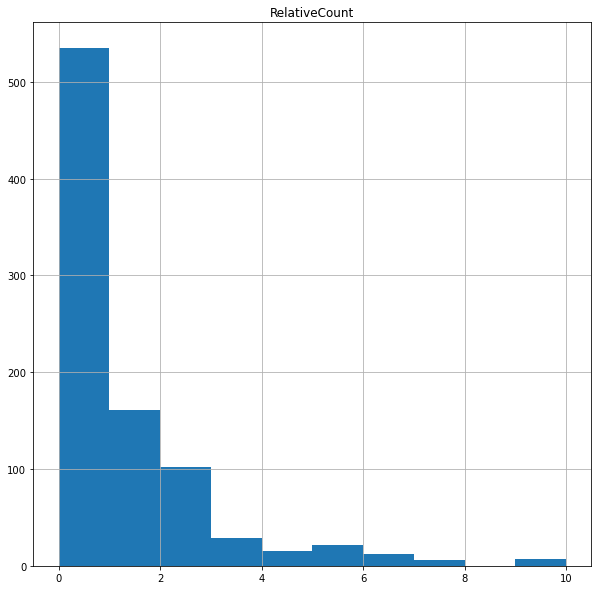

In [19]:
hist = df_train.hist(figsize=(10,10),column='RelativeCount')

**Was a passenger travelling alone?**

numpy.where(): Return elements chosen from x or y depending on condition.
https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html

In [20]:
df_train['TravelAlone'] = np.where(df_train['SibSp']+df_train['Parch']>0, "No", "Yes")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativeCount,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,0,Yes


In [21]:
df_train['TravelAlone'].value_counts()

Yes    535
No     354
Name: TravelAlone, dtype: int64

See types of plots_documentations pandas

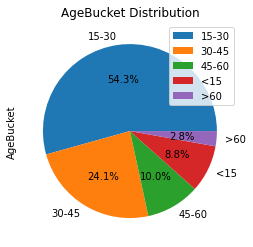

In [22]:
#Since its too much data to visualize and understand, lets bucket the age as below
#feature engineering FTW!
def bucket_age(age):
  if age < 15:
    return "<15"
  if age >= 15 and age < 30:
    return "15-30"
  if age >=30 and age < 45:
    return "30-45"
  if age>=45 and age < 60:
    return "45-60"
  return ">60"

df_train['AgeBucket'] = df_train['Age'].apply(bucket_age)

#Visualize this with a pie chart
pie = df_train['AgeBucket'].value_counts().plot(kind="pie",title='AgeBucket Distribution',legend=True,autopct='%1.1f%%')

Box Plots
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.


Reference

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [23]:
##### Box Plots

#A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

#![alt text](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

#Reference 
#- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
#- https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


**Sex and Fare Relationship**

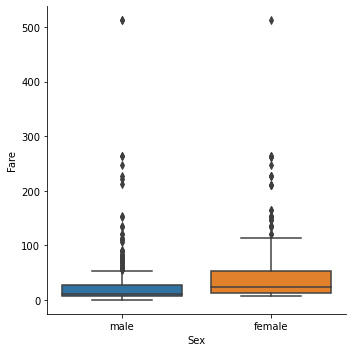

In [24]:
sns.catplot(x="Sex", y="Fare", kind="box", data=df_train)

How does the Pclass relate to the Survival rate?

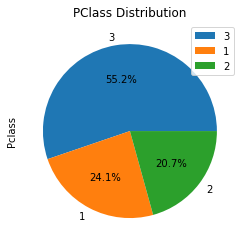

In [25]:
#Lets start off with a bar plot of the Pclass distribution
pie = df_train['Pclass'].value_counts().plot(kind="pie",title='PClass Distribution',legend=True,autopct='%1.1f%%')

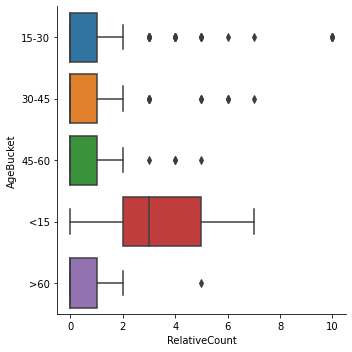

In [26]:
sns.catplot(x="RelativeCount", y="AgeBucket", kind="box", data=df_train)

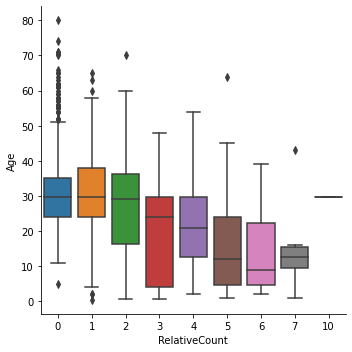

In [27]:
sns.catplot(x="RelativeCount", y="Age", kind="box", data=df_train)


In [28]:
df_train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativeCount,TravelAlone,AgeBucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,1,No,15-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,No,30-45
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,0,Yes,15-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,No,30-45
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,0,Yes,30-45


In [29]:
df_train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativeCount,TravelAlone,AgeBucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,G6,S,1,No,15-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,No,30-45
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S,0,Yes,15-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,No,30-45
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G6,S,0,Yes,30-45
5,6,0,3,"Moran, Mr. James",male,29.642093,0,0,330877,8.4583,G6,Q,0,Yes,15-30
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0,Yes,45-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,G6,S,4,No,<15
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,G6,S,2,No,15-30
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C,1,No,<15


   Name_Length  Survived
0            1  0.428571
1            2  0.293269
2            3  0.530928
3            4  0.783333
4            5  1.000000
5            6  1.000000


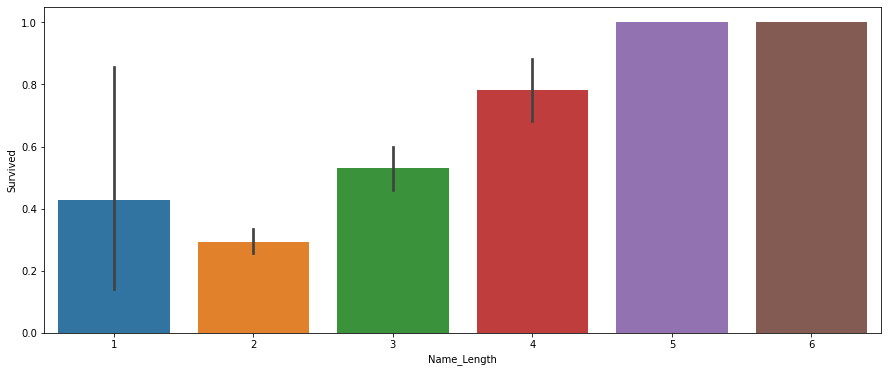

In [30]:
# NAME

# Name Length
# I Can't really Explain why but name length has a clear pattern and seems to significantly improve the
# result and hence I am obliged to use it in my Code
df_train['Name_Length'] = df_train['Name'].apply(lambda x : len(x))
df_train['Name_Length'] = ((df_train.Name_Length)/15).astype(np.int64)+1
print(df_train[['Name_Length','Survived']].groupby(['Name_Length'], as_index = False).mean())
plt.subplots(figsize=(15, 6))
sns.barplot(data=df_train,x='Name_Length',y='Survived')


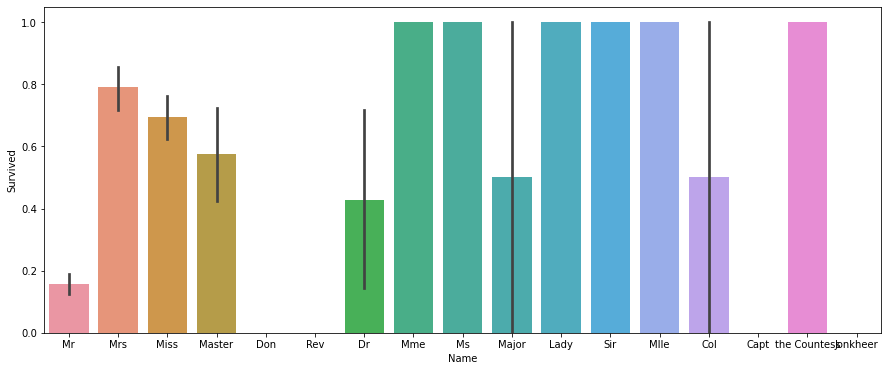

In [31]:
# You may now think that Name is a useless column but Name contains somethings very important,'Titles'
# If You observe closely you will notice that all names have a Title, example : 'MR','Mrs','Cpt',etc

# EXTRACTING TITLE FORM NAME
title = df_train.Name.values
import re
for i in range(len(title)):
    r = re.search(', ([A-Za-z ]*)',title[i])
    title[i] = r.group(1)
df_train.loc[:,'Name'] = title 
plt.subplots(figsize=(15, 6))
sns.barplot(data=df_train,x='Name',y='Survived')
# Hence from the figure below show that it may play an important role in the decision making process

In [32]:
# Now We have completed Phase 1 of the Code that is Preprocesing Infromation
# the 2nd Phase of the code is to encode the data and and dropiing unwanted columns

# Encoding String values to Numbers
from sklearn.preprocessing import LabelEncoder

#SEX
lb_Sex = LabelEncoder()
df_train['Sex'] = lb_Sex.fit_transform(df_train.Sex)

#TravelAlone
lb_TravelA = LabelEncoder()
df_train['TravelAlone'] = lb_TravelA.fit_transform(df_train.TravelAlone)

In [33]:

#TITLE
lb_Title = LabelEncoder()
df_train['Name'] = lb_Title.fit_transform(df_train.Name)

#AGE_B
lb_AgeB = LabelEncoder()
df_train['AgeBucket'] = lb_AgeB.fit_transform(df_train.AgeBucket)


# DROPPING THE EXTRA COLUMNS
df_train.drop(labels=['SibSp','Parch','Ticket','Fare','Age','PassengerId','Cabin',],axis=1,inplace=True)




In [34]:
df_train.head()


,Survived,Pclass,Name,Sex,Embarked,RelativeCount,TravelAlone,AgeBucket,Name_Length
0,0,3,11,1,S,1,0,0,2
1,1,1,12,0,C,1,0,1,4
2,1,3,8,0,S,0,1,0,2
3,1,1,12,0,S,1,0,1,3
4,0,3,11,1,S,0,1,1,2


In [35]:
df_train.drop(labels=['Embarked'],axis=1,inplace=True)

In [36]:
df_train.head()


,Survived,Pclass,Name,Sex,RelativeCount,TravelAlone,AgeBucket,Name_Length
0,0,3,11,1,1,0,0,2
1,1,1,12,0,1,0,1,4
2,1,3,8,0,0,1,0,2
3,1,1,12,0,1,0,1,3
4,0,3,11,1,0,1,1,2


In [37]:
df_train.Survived.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 889, dtype: bool

In [38]:
#RETREIVING THE TEST AND THE TRAIN SETS

#df_test = df_train[df_train.Survived.isnull()]
#df_train = df_train[df_train.Survived.notnull()]

msk = np.random.rand(len(df_train)) <= 0.7


df_test = df_train[~msk]
df_train = df_train[msk]


df_test = df_test.drop(['Survived'],axis=1)

In [39]:
#DIVIDING THE DATA INTO Y_TRAIN AND X_TRAIN AND CONVERTING THEM INTO NP ARRAYS
y_train = df_train.loc[:,'Survived'].values
x_train =df_train.drop(['Survived'],axis=1).values
x_test = df_test.values

In [40]:
df_train.head()
x_test

array([[ 3, 11,  1, ...,  0,  0,  2],
       [ 1, 12,  0, ...,  0,  1,  3],
       [ 3, 11,  1, ...,  1,  1,  2],
       ...,
       [ 3, 11,  1, ...,  1,  0,  2],
       [ 1,  8,  0, ...,  1,  0,  2],
       [ 1, 11,  1, ...,  1,  0,  2]])

In [41]:
x_test

array([[ 3, 11,  1, ...,  0,  0,  2],
       [ 1, 12,  0, ...,  0,  1,  3],
       [ 3, 11,  1, ...,  1,  1,  2],
       ...,
       [ 3, 11,  1, ...,  1,  0,  2],
       [ 1,  8,  0, ...,  1,  0,  2],
       [ 1, 11,  1, ...,  1,  0,  2]])

In [42]:
# Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler((-1,1))
x_train  = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)


In [43]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
dict_K = {}
dic = {}

#Kfold Validation
def get_acc(Xtrain,Ytrain,model):
    from sklearn.model_selection import KFold
    acc = []
    k=KFold(n_splits=4)
    for train , test in k.split(Xtrain,y=Ytrain):
        x_train = Xtrain[train,:]
        y_train = Ytrain[train]
        x_test = Xtrain[test,:]
        y_test = Ytrain[test]
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
        acc.append((cm[1,1]+cm[0,0])/((cm[1,0]+cm[0,1]+cm[1,1]+cm[0,0])+1e-5))
    return acc

In [44]:
df_train.head()

,Survived,Pclass,Name,Sex,RelativeCount,TravelAlone,AgeBucket,Name_Length
1,1,1,12,0,1,0,1,4
2,1,3,8,0,0,1,0,2
5,0,3,11,1,0,1,0,2
7,0,3,7,1,4,0,3,3
8,1,3,12,0,2,0,0,4


In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25,criterion='entropy')
dict_K['Random_forest'] = get_acc(x_train,y_train,classifier)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [46]:
# Preparing the CSV For Submition
p = dataset_gd.PassengerId
p = pd.concat([p,pd.DataFrame(y_pred.astype(np.int64),columns=['Survived'])],axis=1)
p.to_csv('Tit_pred.csv',index=False)